In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import json
data_path = 'D:/visualstudiocode/project/eufeedbackapp/src/data/A_data'

## language distribution

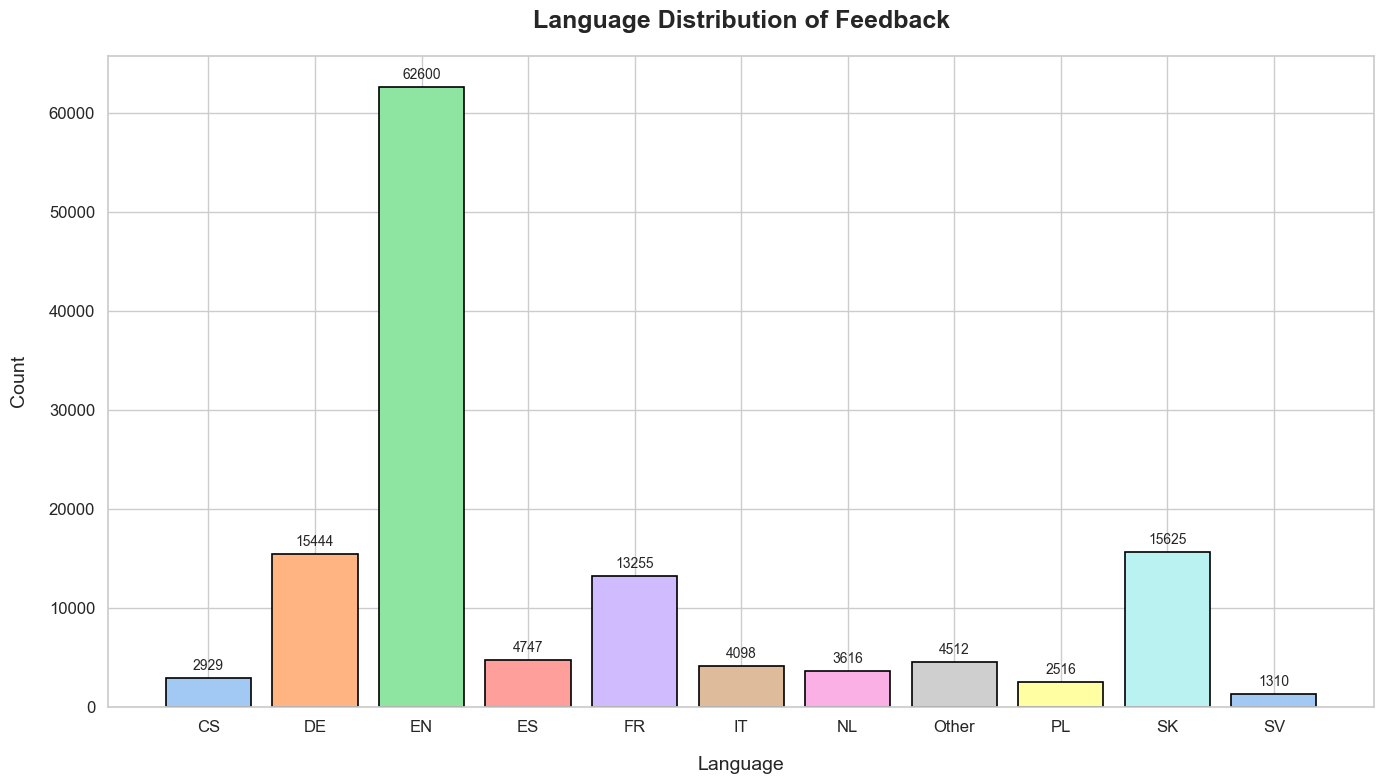

In [14]:
ldata = pd.read_csv(os.path.join(data_path, 'Language Distribution.csv'))

ldata['language'] = ldata['language'].where(ldata['Count'] >= 900, 'Other')
ldata = ldata.groupby('language', as_index=False)['Count'].sum()

# 设置Seaborn样式和配色
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# 绘制柱状图，使用柔和的配色
bars = plt.bar(ldata['language'], ldata['Count'], color=sns.color_palette("pastel"), edgecolor='black', linewidth=1.2)

# 添加标题和标签
plt.title('Language Distribution of Feedback', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Language', fontsize=14, labelpad=15)
plt.ylabel('Count', fontsize=14, labelpad=15)

# 设置 x 轴标签旋转角度和字体大小
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# 添加数据标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Topic Distribution

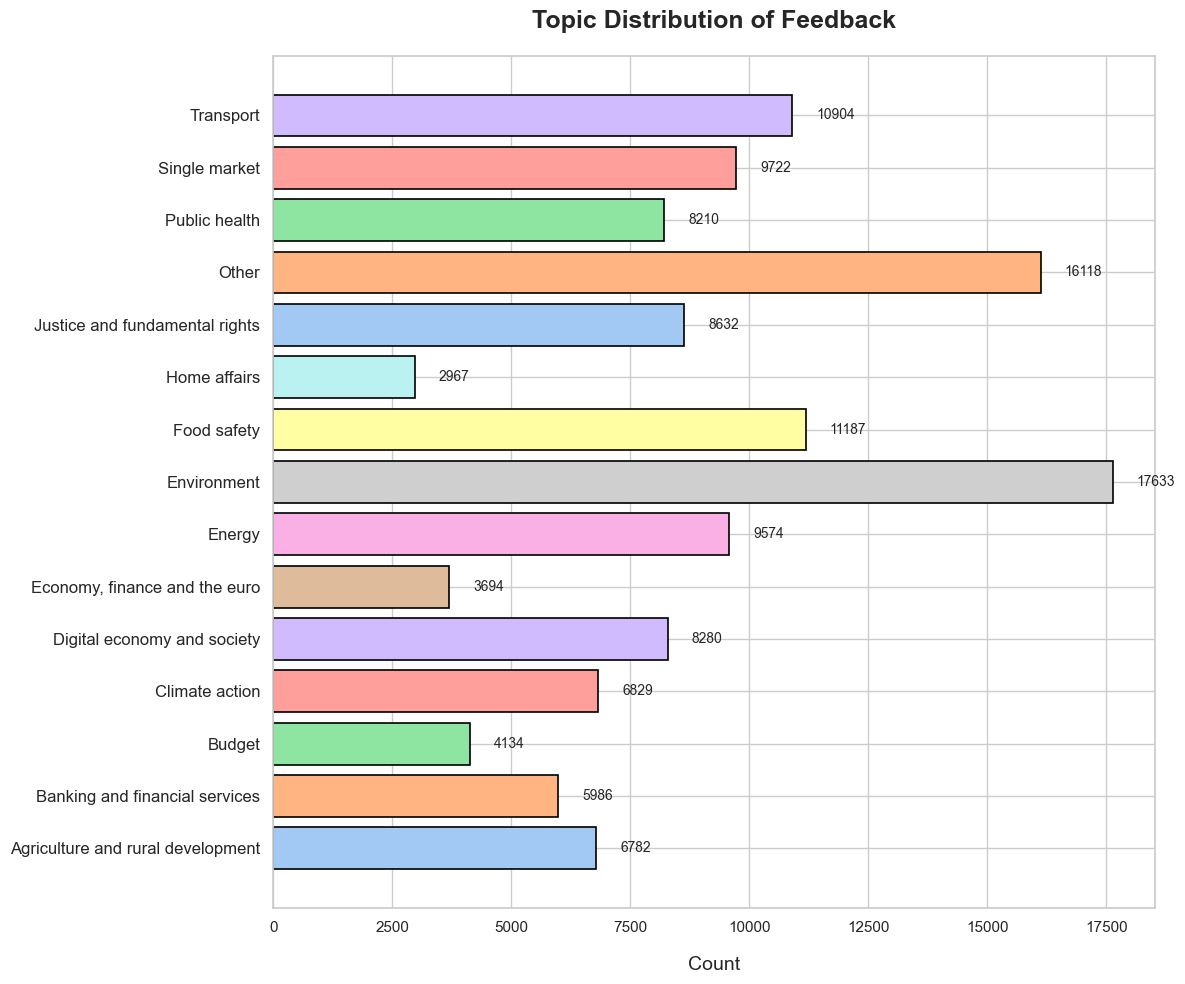

In [ ]:
ldata = pd.read_csv(os.path.join(data_path, 'Topic Distribution.csv'))

# 将小于1200的类别归为 "Other"
ldata['topic'] = ldata['topic'].where(ldata['Count'] >= 1200, 'Other')
ldata = ldata.groupby('topic', as_index=False)['Count'].sum()

# 设置Seaborn样式和配色
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))

# 绘制水平条形图，使用柔和的配色
bars = plt.barh(ldata['topic'], ldata['Count'], color=sns.color_palette("pastel"), edgecolor='black', linewidth=1.2)

# 添加标题和标签
plt.title('Topic Distribution of Feedback', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=15)
plt.ylabel('')  # 移除 y 轴标签

# 设置 y 轴标签字体大小
plt.yticks(fontsize=12)

# 添加数据标签
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 500, bar.get_y() + bar.get_height() / 2, int(xval), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### User Distribution

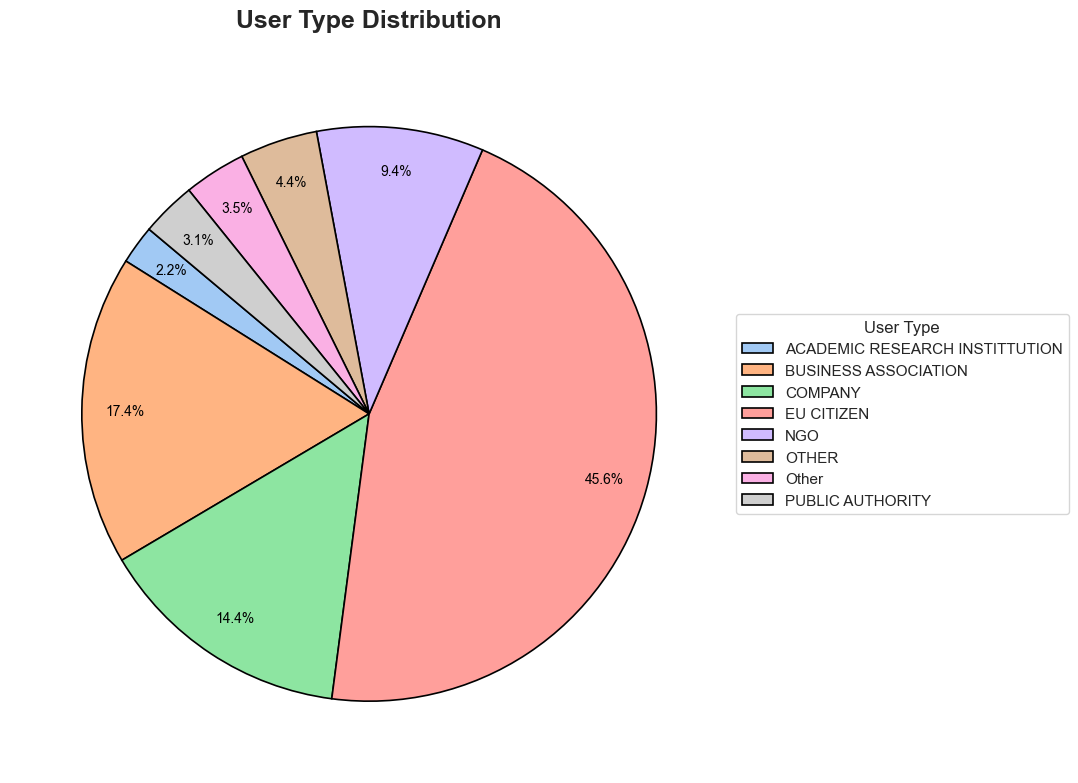

In [21]:
ldata = pd.read_csv(os.path.join(data_path, 'User Type Distribution.csv'))

# 将空字符串替换为 'UNKNOWN'
ldata['userType'] = ldata['userType'].replace("", "UNKNOWN")

# 计算总数，合并小于2%（即总数的2%）的用户类型为 'Other'
total_count = ldata['Count'].sum()
ldata['userType'] = ldata.apply(lambda x: x['userType'] if x['Count'] >= total_count * 0.02 else 'Other', axis=1)
ldata = ldata.groupby('userType', as_index=False)['Count'].sum()

# 设置配色方案和图形大小
plt.figure(figsize=(12, 8))
colors = sns.color_palette("pastel")

# 绘制饼图，标签在侧面显示
wedges, texts, autotexts = plt.pie(
    ldata['Count'],
    labels=None,  # 不直接显示标签
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
    pctdistance=0.85  # 调整百分比标签位置
)

# 设置标签在侧面显示
plt.legend(wedges, ldata['userType'], title="User Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 设置标题
plt.title('User Type Distribution', fontsize=18, fontweight='bold', pad=20)

# 调整自动百分比标签字体
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

### Number Distribution

C:\Users\86183\AppData\Local\Temp\ipykernel_22228\1080194371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Range', y='Count', data=range_counts, palette=colors, edgecolor='black')
C:\Users\86183\AppData\Local\Temp\ipykernel_22228\1080194371.py:19: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  bars = sns.barplot(x='Range', y='Count', data=range_counts, palette=colors, edgecolor='black')


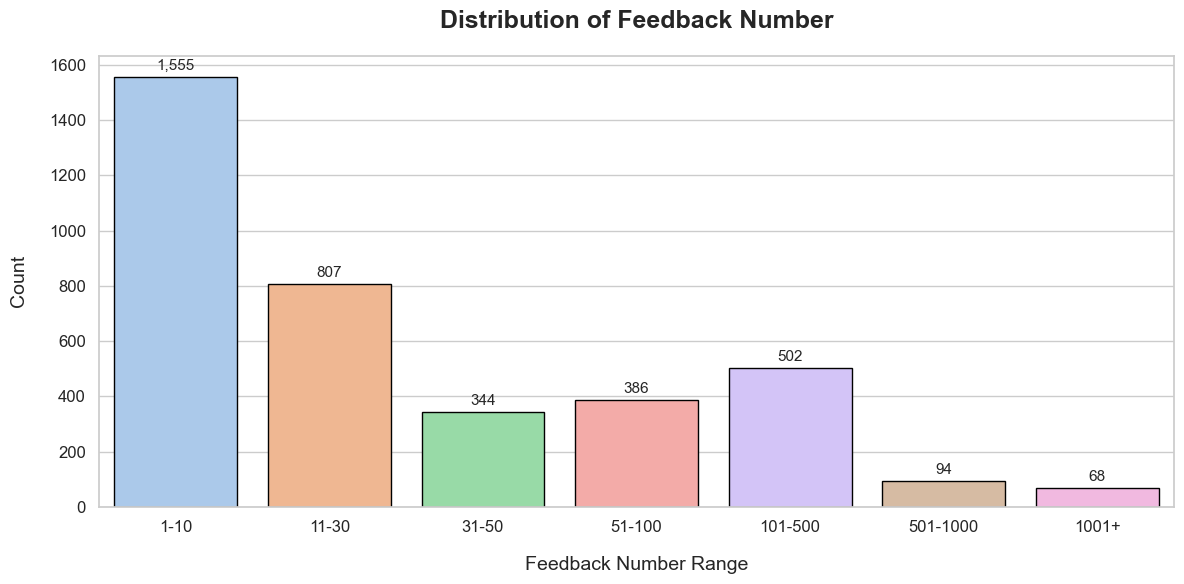

In [31]:
ldata = pd.read_csv(os.path.join(data_path, 'Number Distribution.csv'))

# 转换 totalFeedback 为数值
ldata['totalFeedback'] = pd.to_numeric(ldata['totalFeedback'], errors='coerce')

# 定义区间，包括细分的1-50区间
bins = [1, 10, 30, 50, 100, 500, 1000, float('inf')]
labels = ['1-10', '11-30', '31-50', '51-100', '101-500', '501-1000', '1001+']
ldata['Range'] = pd.cut(ldata['totalFeedback'], bins=bins, labels=labels, include_lowest=True)

# 统计每个区间的数量
range_counts = ldata.groupby('Range', observed=False)['Count'].sum().reset_index()

# 设置 Seaborn 样式和配色
sns.set_theme(style="whitegrid")
colors = sns.color_palette("pastel")
# 绘制更美观的柱状图
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Range', y='Count', data=range_counts, palette=colors, edgecolor='black')
# 设置标题和轴标签
plt.title('Distribution of Feedback Number', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Feedback Number Range', fontsize=14, labelpad=15)
plt.ylabel('Count', fontsize=14, labelpad=15)

# 添加数据标签到每个柱上方
for bar in bars.patches:
    bars.annotate(format(int(bar.get_height()), ','),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=11, xytext=(0, 8),
                  textcoords='offset points')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Words Count Distribution

C:\Users\86183\AppData\Local\Temp\ipykernel_22228\3667971771.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Length_Range', x='Count', data=length_counts, palette=colors, edgecolor='black')
C:\Users\86183\AppData\Local\Temp\ipykernel_22228\3667971771.py:25: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  bars = sns.barplot(y='Length_Range', x='Count', data=length_counts, palette=colors, edgecolor='black')


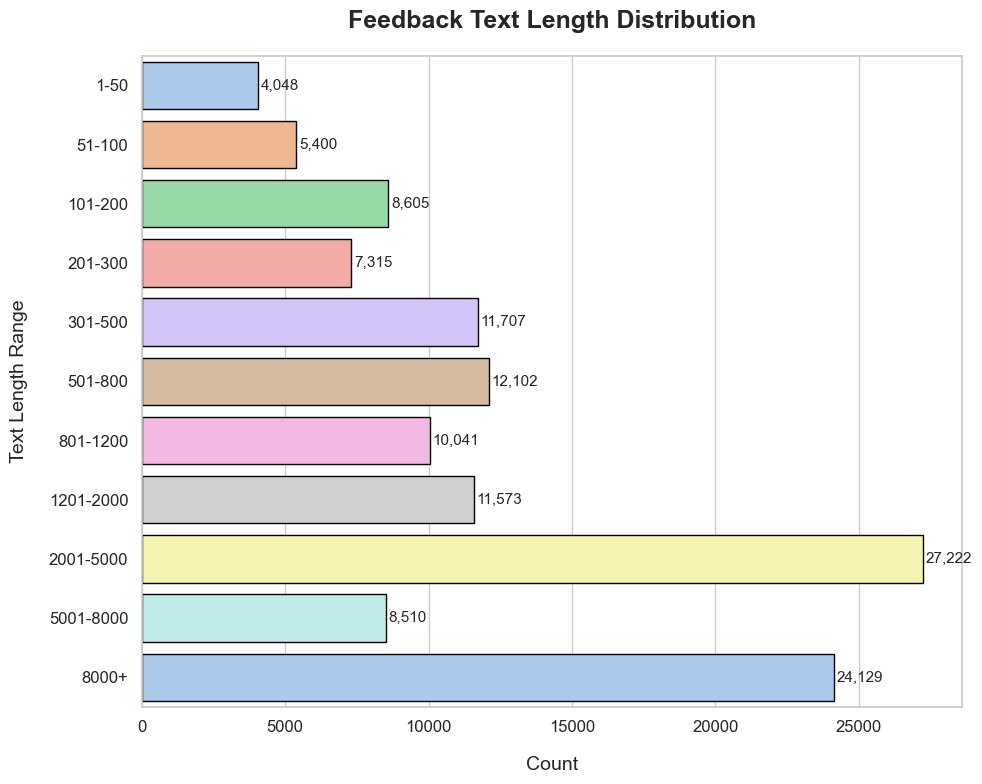

In [37]:
with open(os.path.join(data_path, 'processed_feedback_data.json'), 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# 转换 JSON 数据为 DataFrame
df = pd.DataFrame(json_data)

# 计算每条反馈的文本长度
df['feedback_length'] = df['feedback'].apply(len)

# 定义长度区间
bins = [1, 50, 100, 200, 300, 500, 800, 1200, 2000, 5000, 8000, float('inf')]
labels = ['1-50', '51-100', '101-200', '201-300', '301-500', '501-800', '801-1200', '1201-2000', '2001-5000', '5001-8000', '8000+']
df['Length_Range'] = pd.cut(df['feedback_length'], bins=bins, labels=labels, include_lowest=True)

# 统计每个长度区间的数量
length_counts = df['Length_Range'].value_counts().sort_index().reset_index()
length_counts.columns = ['Length_Range', 'Count']

# 设置 Seaborn 样式
sns.set_theme(style="whitegrid")
colors = sns.color_palette("pastel")

# 绘制水平条形图
plt.figure(figsize=(10, 8))
bars = sns.barplot(y='Length_Range', x='Count', data=length_counts, palette=colors, edgecolor='black')

# 添加标题和轴标签
plt.title('Feedback Text Length Distribution', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=15)
plt.ylabel('Text Length Range', fontsize=14, labelpad=15)

# 在条形图右侧显示数量标签
for bar in bars.patches:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}',
             ha='left', va='center', size=11)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()